# Implement Agglomerative Hierarchical Clustering using Python.

# Table Of Contents
[1. Introduction](#1.Introduction)\
[2. Agglomerative clustering and Divisive clustering](#2.-Agglomerative_clustering_and_Divisive_clustering)\
[3. Algorithm with python methods](#3.-Algorithm_with_python_methods)\
[4. Description of the data](#4.-Description_of_the_data)\
[5. Data normalization](#5.-Data_normalization)\
[6. Observation](#6.-Observation)\
[7. Dendogram](#7.-Dendogram)\
[8. Conclusion](#8.-Conclusion)

# 1. Introduction

Unsupervised learning involves working with data where the class labels are unknown. In this approach, the data is visualized to determine if it naturally forms clusters. Cluster analysis is then applied to group the data into meaningful and potentially valuable clusters. It is important to note that these clusters may or may not align with human perception of similarity.


Hierarchical clustering stands as a fundamental method in statistical learning for clustering. In cases where our dataset is not excessively large and we desire to observe not only the cluster label assigned to each point but also gain insights into the internal structure of the overall picture, hierarchical clustering serves as an excellent initial approach.

The basic criteria of Hierarchical clustering are:
1. The tree-like structure is established by decomposing the data.
2. Utilizes the distance between the closest or farthest points in adjacent clusters to enhance accuracy.
3. Errors are unable to be rectified in the subsequent stages.


There are two main types of hierarchical clustering methods: 
- Agglomerative and
- Divisive clustering.


The primary distinction between the two lies in the direction of the clustering process.


# 2. Agglomerative clustering and Divisive clustering
Agglomerative clustering adopts a bottom-up strategy wherein every data point is initially considered as an individual cluster. Subsequently, these clusters are merged iteratively to form larger clusters. Agglomerative Hierarchical Clustering involves treating each data point as an individual cluster at the beginning. Afterward, we merge the closest clusters to create a new cluster. This process continues until all data points are combined into one single cluster. Whereas, Divisive clustering is an approach that starts with the entire dataset as one cluster and then splits the larger clusters recursively as the process continues.


We will delve into the topic of agglomerative clustering, which is widely favored for its ability to represent hierarchical clustering. This preference stems from its:
- straightforward implementation,
- superior noise handling, and
-  computational efficiency when dealing with datasets of moderate size.





# 3. Algorithm to describe the process with Python
### Step-1.
Initially, we develop a fundamental function capable of assessing the distance between any two clusters (it is worth mentioning that a data point can be considered as its cluster).


In [19]:

def calculate_distance(cluster1, cluster2, method='euclidean'):
    """
    Calculate the distance between two clusters using specified method.

    Args:
    - cluster1: List of points in cluster 1.
    - cluster2: List of points in cluster 2.
    - method: Method to calculate distance ('euclidean' or any other supported method).

    Returns:
    - Distance between the two clusters.
    """
    if method == 'euclidean':
        return calculate_euclidean_distance(cluster1, cluster2)
    # Add more distance calculation methods here if needed
    else:
        raise ValueError("Unsupported distance calculation method")

def calculate_euclidean_distance(cluster1, cluster2):
    """
    Calculate the Euclidean distance between two clusters.

    Args:
    - cluster1: List of points in cluster 1.
    - cluster2: List of points in cluster 2.

    Returns:
    - Euclidean distance between the two clusters.
    """
    min_distance = float('inf')           ### 'inf' -> Numerical calculation, mathematically infinite
    for point1 in cluster1:
        for point2 in cluster2:
            distance = euclidean_distance(point1, point2)
            if distance < min_distance:
                min_distance = distance
    return min_distance


### Step- 2.
The above function computes the minimum distance (either Euclidean or Manhattan) between any two points from the provided two clusters. To observe its functionality, we can examine the following small example:

In [20]:
# Example usage
cluster_a = [[1, 2], [2, 3]]
cluster_b = [[4, 5], [5, 6]]
distance = calculate_distance(cluster_a, cluster_b, method='euclidean')
print("Euclidean Distance:", distance)

Euclidean Distance: 2.8284271247461903


# Step- 3.
The calculate_distance function is responsible for calculating the distance between any two clusters/points. However, to obtain the pairwise distances of all the data points, we must develop a function to store this information in a matrix in the following code:

In [21]:
import numpy as np

def compute_proximity_matrix(clusters, distance_method):
    """
    Compute the proximity matrix for the clusters.

    Args:
    - clusters: List of clusters.
    - distance_method: Method to use for distance calculation.

    Returns:
    - matrix: A 2D matrix of distances.
    """
    num_clusters = len(clusters)
    matrix = np.zeros((num_clusters, num_clusters))

    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            dist = calculate_distance(clusters[i], clusters[j], method=distance_method)
            matrix[i, j] = matrix[j, i] = dist

    return matrix

### Step- 4.
After obtaining the complete pairwise distance matrix for the provided set of clusters, it is necessary to determine the method for merging two clusters if they are close. 

A simple approach is to merge only the pair of clusters that have the shortest distance between them. To achieve this, we can define the merge cluster function as follows:

In [22]:
import numpy as np

def merge_clusters(clusters, proximity_matrix):
    """
    Merge the two closest clusters.

    Args:
    - clusters: List of current clusters.
    - proximity_matrix: Current proximity matrix.

    Returns:
    - Updated clusters and proximity matrix.
    """
    # Find the two closest clusters
    min_dist = np.inf
    closest_pair = (0, 0)

    for i in range(len(proximity_matrix)):
        for j in range(i + 1, len(proximity_matrix)):
            if proximity_matrix[i, j] < min_dist:
                min_dist = proximity_matrix[i, j]
                closest_pair = (i, j)

    # Merge them
    new_cluster = clusters[closest_pair[0]] + clusters[closest_pair[1]]
    new_clusters = [clusters[i] for i in range(len(clusters)) if i not in closest_pair]
    new_clusters.append(new_cluster)

    # Update the proximity matrix
    new_proximity_matrix = compute_proximity_matrix(new_clusters, 'euclidean')  # Assuming 'euclidean' as the distance method

    return new_clusters, new_proximity_matrix

### Step- 5.
As the distance matrix calculation and cluster merging occur iteratively, it is essential to establish a stopping point for the process. One effective approach is to outline all stop criteria within an evaluation function.

In [23]:
def check_stopping_criteria(clusters, criteria, value):
    """
    Check if the stopping criteria have been met.

    Args:
    - clusters: Current list of clusters.
    - criteria: Stopping criteria ('number_of_clusters', 'distance_threshold', etc.)
    - value: The value associated with the stopping criteria.

    Returns:
    - Boolean indicating if the stopping criteria are met.
    """
    if criteria == 'number_of_clusters':
        return len(clusters) <= value
    elif criteria == 'distance_threshold':
        # Check if the minimum distance between any two clusters is greater than the threshold
        for i, cluster1 in enumerate(clusters):
            for j, cluster2 in enumerate(clusters):
                if i != j and calculate_distance(cluster1, cluster2, 'euclidean') < value:
                    return False
        return True
    else:
        raise ValueError("Unsupported stopping criteria.")

    return False

### Step- 6.
At this point, we have gathered all the necessary elements for hierarchical clustering. The only remaining task is to create a wrapper function that incorporates the aforementioned functions and integrates them into the agglomerative clustering logic.

def hierarchical_clustering(
    data, 
    distance_method='euclidean', 
    stopping_criteria='number_of_clusters', 
    stopping_value=1
):
    """
    Perform hierarchical clustering on the data.

    Args:
    - data: Dataset for clustering.
    - distance_method: Method for distance calculation.
    - stopping_criteria: Criteria to stop the clustering process.
    - stopping_value: Value associated with the stopping criteria.

    Returns:
    - Final clusters.
    """
    # Initialize clusters with each data point as a single cluster
    clusters = [[point] for point in data]

    # Compute initial proximity matrix
    proximity_matrix = compute_proximity_matrix(clusters, distance_method)

    while not check_stopping_criteria(clusters, stopping_criteria, stopping_value):
        clusters, proximity_matrix = merge_clusters(clusters, proximity_matrix)

    return clusters

### Step- 7.
The hierarchical_clustering function initializes single-point clusters based on the data, computes the initial proximity matrix, and then iteratively checks the stopping criteria and merges clusters. The default values for stopping_criteria and stopping_value are set to "number_of_clusters" and 1 respectively. Consequently, the default behavior of the function results in merging all data points into a single large cluster.

Neverthelesst the default behavior of the aforementioned function is not particularly useful as it only provides the final large cluster without revealing the internal sub-cluster structure of the data. To address this issue and obtain more detailed information, it is necessary to modify the codtoto keep track of the merging history.

In [24]:
def hierarchical_clustering(data, distance_method='euclidean', stopping_criteria='number_of_clusters', stopping_value=2):
    """
    Perform hierarchical clustering on the data and track the history for dendrogram drawing.

    Args:
    - data: Dataset for clustering.
    - distance_method: Method for distance calculation.
    - stopping_criteria: Criteria to stop the clustering process.
    - stopping_value: Value associated with the stopping criteria.

    Returns:
    - Final clusters and merge history for dendrogram.
    """
    # Initialize clusters with each data point as a single cluster
    clusters = [[point] for point in data]
    # Initialize a list to track the merge history
    merge_history = []
    # Assign a unique identifier to each initial cluster
    cluster_ids = list(range(len(data)))

    # Compute initial proximity matrix
    proximity_matrix = compute_proximity_matrix(clusters, distance_method)

    while not check_stopping_criteria(clusters, stopping_criteria, stopping_value):
        clusters, proximity_matrix, merged_clusters = merge_clusters(clusters, proximity_matrix)
        # Record the merge operation with cluster identifiers and distance
        merge_distance = proximity_matrix[merged_clusters]
        merge_history.append((cluster_ids[merged_clusters[0]], cluster_ids[merged_clusters[1]], merge_distance))
        # Update cluster identifiers
        cluster_ids.append(max(cluster_ids) + 1)
        cluster_ids = [cluster_ids[i] for i in range(len(cluster_ids)) if i not in merged_clusters]

    return clusters, merge_history

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(merge_history):
    """
    Plot a dendrogram from the merge history of hierarchical clustering.

    Args:
    - merge_history: List of tuples, each representing a merge operation.
    """
    # Convert merge history to a format compatible with scipy's dendrogram function
    # Each row: [idx1, idx2, dist, sample_count]
    linkage_matrix = []
    next_index = len(merge_history)  # Initial index for newly formed clusters
    cluster_sizes = {i: 1 for i in range(len(merge_history) + 1)}  # Initial cluster sizes

    for i, (idx1, idx2, dist) in enumerate(merge_history):
        sample_count = cluster_sizes[idx1] + cluster_sizes[idx2]
        linkage_matrix.append([idx1, idx2, dist, sample_count])

        cluster_sizes[next_index] = sample_count
        next_index += 1

    # Plot the dendrogram
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()


In [26]:
def hierarchical_clustering(data_points, stopping_value):
    """
    Perform hierarchical clustering using single linkage.

    Args:
    - data_points: List of data points, each represented as a list of coordinates.
    - stopping_value: Clustering stops when all clusters have a distance greater than this value.

    Returns:
    - final_clusters: List of clusters formed at the end of clustering.
    - merge_history: List of tuples representing the merge operations.
    """
    clusters = [[point] for point in data_points]  # Start with each point as its own cluster
    merge_history = []  # Store merge operations

    while len(clusters) > 1:
        min_dist = float('inf')
        merge_indices = None

        # Find the two closest clusters
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                for point1 in clusters[i]:
                    for point2 in clusters[j]:
                        dist = euclidean_distance(point1, point2)
                        if dist < min_dist:
                            min_dist = dist
                            merge_indices = (i, j)

        # Merge the closest clusters
        cluster1, cluster2 = merge_indices
        merged_cluster = clusters[cluster1] + clusters[cluster2]
        merge_history.append((cluster1, cluster2, min_dist))
        del clusters[cluster2]
        del clusters[cluster1]
        clusters.append(merged_cluster)

        # Check stopping condition
        if min_dist > stopping_value:
            break

    final_clusters = clusters
    return final_clusters, merge_history


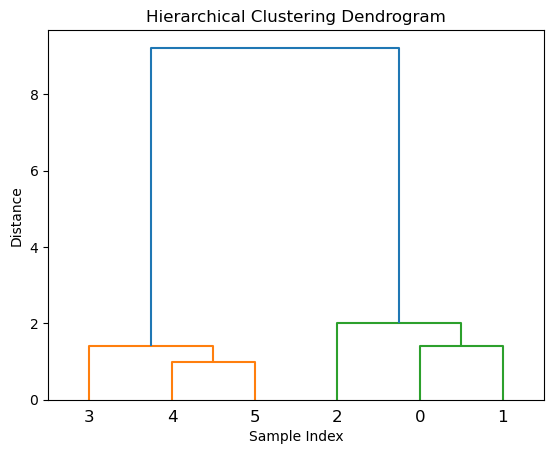

In [27]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster

def hierarchical_clustering(data_points, stopping_value):
    """
    Perform hierarchical clustering on the given data points.

    Args:
    - data_points: List of data points, where each data point is a list of coordinates.
    - stopping_value: Stopping criteria value.

    Returns:
    - final_clusters: List of clusters after clustering stops.
    - merge_history: Merge history of hierarchical clustering.
    """
    # Compute pairwise distances
    distances = pdist(data_points)

    # Perform hierarchical/agglomerative clustering
    merge_history = linkage(distances, method='complete')

    # Cut the dendrogram at the stopping value
    final_clusters = fcluster(merge_history, t=stopping_value, criterion='distance')

    return final_clusters, merge_history

def plot_dendrogram(merge_history):
    """
    Plot a dendrogram from the merge history of hierarchical clustering.

    Args:
    - merge_history: Merge history of hierarchical clustering.
    """
    dendrogram(merge_history)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Sample data
data_points = [
    [1, 2], [2, 3], [3, 2],
    [8, 7], [7, 8], [8, 8]
]

# Perform hierarchical clustering
final_clusters, merge_history = hierarchical_clustering(data_points, stopping_value=2)

# Plot the dendrogram
plot_dendrogram(merge_history)



In [28]:
def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5


C:\Users\Sarmita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


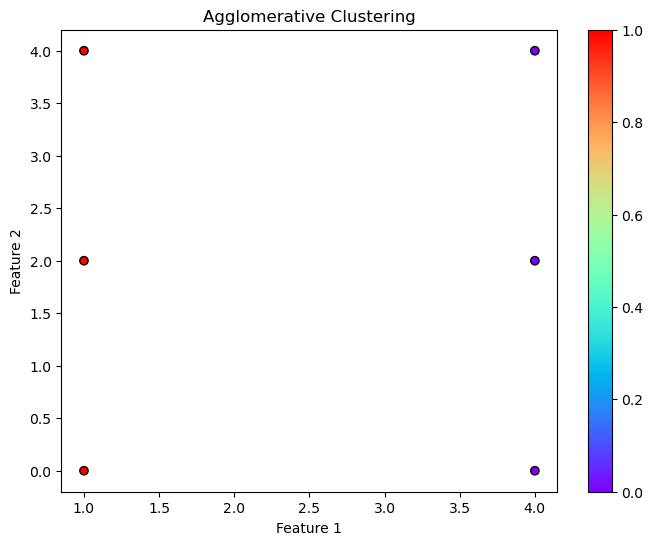

In [29]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# Example data (2D points)
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Create the model
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit & predict
labels = clustering.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


### Final Step:.
The cluster index and distance are stored in the merge_history list. For visualization,
- the dendrogram is the recommended tool to use.
- We shall use a customer segmentation data set. 

# 4. Agglomerative Clustering With DataSet

In this project, we will focus on customer segmentation using hierarchical clustering in Python. Our objective is to divide the clients of a wholesale distributor into different segments based on their annual spending across various product categories. 

The wholesale customer dataset comprises 440 data points d theht variables, namely Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_paper, and Delicassen.

In [30]:
# Implementation of Agglomerative Clustering
# Agglomerative clustering can be executed in Python by utilizing sklearn and scipy libraries.

# Library imports
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [31]:
data = pd.read_csv('Wholesale-customers-data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# 5. Data normalization
Normalization is a crucial step before implementing Hierarchical Clustering. It ensures that each variable is on the same scale, which is essential for accurate analysis. If the variables have different scales, the model may exhibit bias toward variables with larger magnitudes, such as Fresh or Milk (as shown in the table above). Therefore, it is necessary to normalize the data and align all variables to a consistent scale.

In [32]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


# 6 Observation
The magnitudes of the variables are quite comparable. With this observation in mind, we can proceed confidently. Our next step involves constructing a dendrogram to determine the optimal number of clusters for this specific issue.

# 7. Dendogram
A dendrogram illustrates the hierarchical connection among objects, typically generated as a result of hierarchical clustering. Its primary purpose is to determine the optimal allocation of objects to clusters.

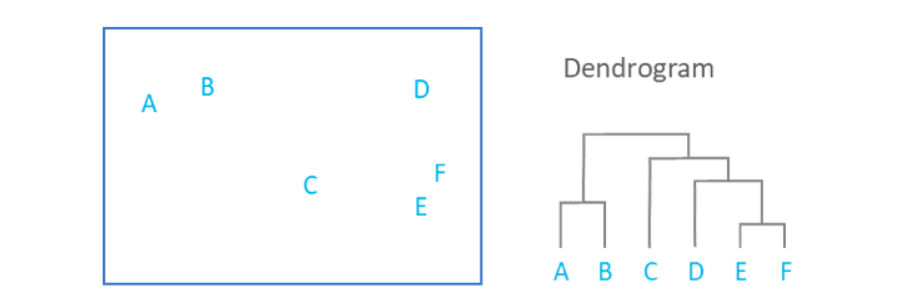 

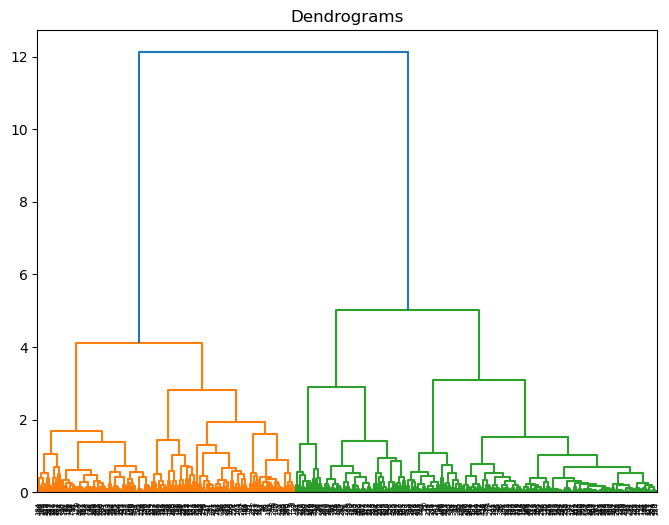

In [33]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 6))  
plt.title("Dendrograms")  
dendogram = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The samples are plotted on the x-axis, while the distance between these samples is represented on the y-axis. The blue line, which corresponds to the maximum distance, can be used to establish a threshold of 6. By cutting the dendrogram at this threshold, we can make a decision.

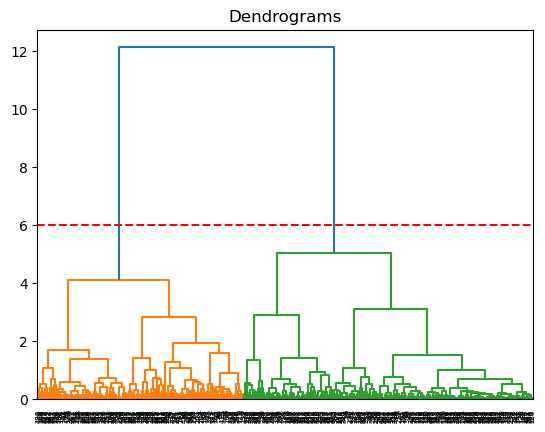

In [16]:
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

We possess a pair of clusters, given that this line divides the dendrogram into two segments. Next, we will implement hierarchical clustering for 2 clusters.

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

C:\Users\Sarmita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

The output displays the values of 0s and 1s, which correspond to the two clusters we have defined. The value 0 indicates the points that belong to the first cluster, while the value 1 represents the points in the second cluster. Let us proceed to visualize these two clusters.

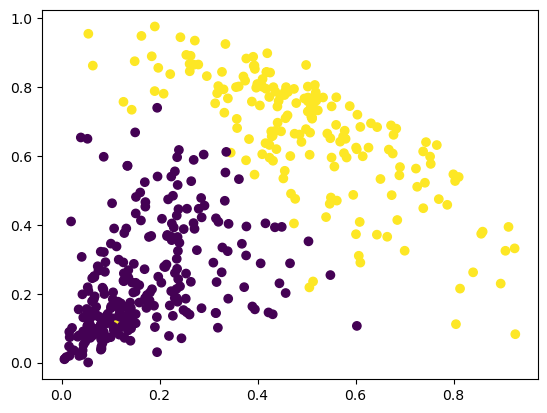

In [18]:
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

# 8. Conclusion
In summary, Agglomerative hierarchical clustering proves to be a highly effective method for segmenting observations. Its flexibility in not requiring the pre-definition of cluster numbers sets it apart from k-Means. Nonetheless, hierarchical clustering may not be the best choice :
- for handling large data sets due to their time complexity, and
- susceptibility to outliers.